In [38]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import torch
import matplotlib.pyplot as plt
import torchvision

In [2]:
from torchvision import datasets,transforms

# define transform to normalise the data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
batch_size=64
# download and train the data set
trainset= datasets.MNIST('mnist',download=True,train=True,transform=transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testset = torchvision.datasets.MNIST('mnist', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [3]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


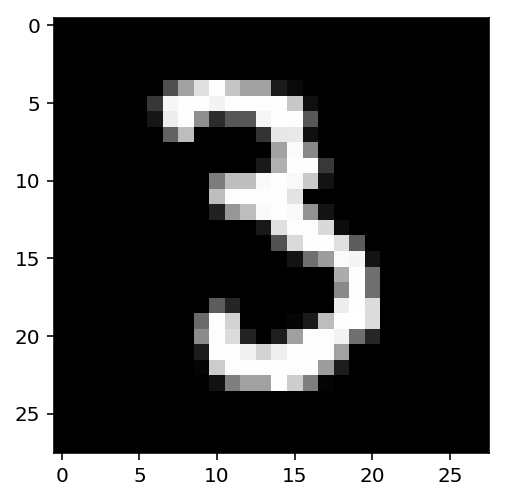

In [4]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

## Exercise:
### * Flatten the batch of images
### * Build multilayer NN with 784 input units, 256 hidden unitas, 10 output units using random tensors for  weights and biases
### * Use sigmoid for hidden layer , leave output layer without activation function

In [5]:
# activation function

def activation(x):
    return 1/(1+torch.exp(-x))


In [6]:
# flatten the images

inputs=images.view(images.shape[0],-1)

In [7]:
# create parameters

w1=torch.randn(784,256)
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

h=activation(torch.mm(inputs,w1)+b1)

out=activation(torch.mm(h,w2)+b2)
print(out.shape)
print(out)            # probability of each class is roughly same so apply softmax 

torch.Size([64, 10])
tensor([[1.6243e-02, 9.9801e-01, 8.6279e-08, 9.9998e-01, 1.3484e-03, 9.4174e-01,
         1.0000e+00, 9.7759e-01, 9.9065e-01, 1.0000e+00],
        [8.2228e-06, 6.6425e-01, 1.3091e-02, 9.8335e-01, 2.1155e-09, 9.4272e-01,
         9.9698e-01, 9.8325e-01, 1.7460e-02, 1.0000e+00],
        [2.0992e-04, 1.7218e-01, 2.6257e-03, 9.7307e-01, 5.3159e-07, 9.9985e-01,
         4.7846e-03, 9.9990e-01, 7.0766e-01, 1.0000e+00],
        [1.1360e-06, 7.2552e-02, 1.8037e-06, 9.9997e-01, 1.9841e-07, 1.0000e+00,
         1.0000e+00, 9.9926e-01, 9.9935e-01, 1.0000e+00],
        [1.5117e-04, 9.9995e-01, 2.5968e-04, 9.9999e-01, 1.7420e-07, 8.6771e-01,
         9.9999e-01, 6.9299e-01, 9.9989e-01, 1.0000e+00],
        [1.1267e-09, 8.3541e-01, 1.9109e-03, 9.6621e-01, 2.9048e-02, 6.0534e-01,
         8.4342e-01, 3.2264e-01, 6.8450e-01, 9.9995e-01],
        [8.3695e-08, 4.4126e-01, 1.3269e-04, 1.5560e-01, 2.9224e-04, 9.9984e-01,
         9.9929e-01, 1.0470e-01, 9.5831e-01, 1.0000e+00],
      

         1.0000e+00, 9.9924e-01, 9.9972e-01, 9.9999e-01]])


In [8]:
# softmax

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities=softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Build network with pytorch

In [9]:
from torch import nn

class Network(nn.Module):
    def _init_(self):
        super()._init_()
        # Input to hidden layer transformation
        self.hidden=nn.Linear(784,256)
        
        # output layer ,10 units , 1 for each class
        self.output=nn.Linear(256,10)
        
        # define sigmoid and softmax output
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
    def forward(self,x):
        # pass input tensor through each operation
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x
    
model = Network()

model      

Network()

### Define network more consisly and precisely using `torch.nn.functional`

In [10]:
import torch.nn.functional as F

class Network(nn.Module):
    def _init_(self):
        super()._init_()
        #input to hidden layer transformations 
        self.hidden=nn.Linear(784,256)
        #output layer , 10 units,1 for each class
        self.output=nn.Linear(256,10)
        
        # hidden layer with sigmoid function
        x=F.sigmoid(self.hidden(x))
        
        # output layer with softmax function 
        x=F.softmax(self.softmax(x))
        
        return x
    

## Exercise:
Build a model that returns a log-softmax as output and calc the loss using the negative log likelihod loss
* `nn.LogSoftmax` and `F.log_softmax()`
## Loss calculation

In [11]:
# Build a feedforward network
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

# define thet loss
criterion=nn.NLLLoss()

# Get data
images,labels=next(iter(trainloader))

# flatten the images
images=images.view(images.shape[0],-1)

# forward pass get logigts
logits=model(images)

# calculate with logits and labels
loss=criterion(logits,labels)

print(loss)

tensor(2.3343, grad_fn=<NllLossBackward>)


## Gradient calculation

In [12]:
print("before backward pass\n",model[0].weight.grad)

loss.backward()

print("After backward pass \n",model[0].weight.grad)

before backward pass
 None
After backward pass 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


## Optimization or parameters update

In [13]:
from torch import optim
# optimizer requires the parameters to optimize and learning rate

optimizer= optim.SGD(model.parameters(),lr=0.001)

print("initial weights",model[0].weight)

images,labels=next(iter(trainloader))

images.resize_(64,784)

# Clear the gradients beacause gradienets are accumulated
optimizer.zero_grad()

#forward pass, backward pass then weighr updates
output=model.forward(images)
loss=criterion(output,labels)
loss.backward()

print("Gradient-",model[0].weight.grad)

# take an update step and few a new weights

optimizer.step()
print("Updated weights",model[0].weight.grad)

initial weights Parameter containing:
tensor([[-0.0037,  0.0111,  0.0135,  ..., -0.0277,  0.0225,  0.0014],
        [ 0.0218, -0.0304, -0.0290,  ..., -0.0056,  0.0168,  0.0057],
        [ 0.0100,  0.0310, -0.0061,  ...,  0.0032, -0.0048,  0.0238],
        ...,
        [ 0.0192,  0.0305,  0.0057,  ...,  0.0010, -0.0248,  0.0140],
        [ 0.0341,  0.0308, -0.0156,  ..., -0.0270,  0.0074, -0.0318],
        [ 0.0260, -0.0331,  0.0125,  ...,  0.0314,  0.0062,  0.0164]],
       requires_grad=True)
Gradient- tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052],
        ...,
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011]])
Updated weights tensor([[ 0.0000,  0.0000,  0.0000,  ...,

In [14]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
Optmizer=optim.SGD(model.parameters(),lr=0.003)

epochs=5

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        # flatten images into 784 long vector
        images=images.view(images.shape[0],-1)
        
        # training pass
        optimizer.zero_grad()
        
        ouput=model(images)
        loss=criterion(ouput,labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    else:
        print(f"training loss:{running_loss/len(trainloader)}")



training loss:2.310144621171931
training loss:2.3101130177471427
training loss:2.3101300085023015
training loss:2.3101556687466878
training loss:2.3101569940286404


## Exercise:
# Classify MNIST data

## Build network

In [15]:
from torch import nn,optim
import torch.nn.functional as F

In [40]:
# Define network achitecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.func1=nn.Linear(784,256)
        self.func2=nn.Linear(256,128)
        self.func3=nn.Linear(128,64)
        self.func4=nn.Linear(64,10)
    def forward(self,x):
        # flatten tensor
        x=x.view(x.shape[0],-1)
        
        x=F.relu(self.func1(x))
        x=F.relu(self.func2(x))
        x=F.relu(self.func3(x))
        x=F.log_softmax(self.func4(x),dim=1)
        
        return x

## Train network

In [17]:
# create network and define criterion and optimizer

model=Classifier()
criterion=nn.NLLLoss()
optimizer= optim.Adam(model.parameters(),lr=0.003)

# train network
epochs=5
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        logps=model(images)
        loss=criterion(logps,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"training loss:{running_loss}")
        
        
        

training loss:320.40972320362926
training loss:158.09952257573605
training loss:125.9373313235119
training loss:112.03945922642015
training loss:96.64546694071032


## Output

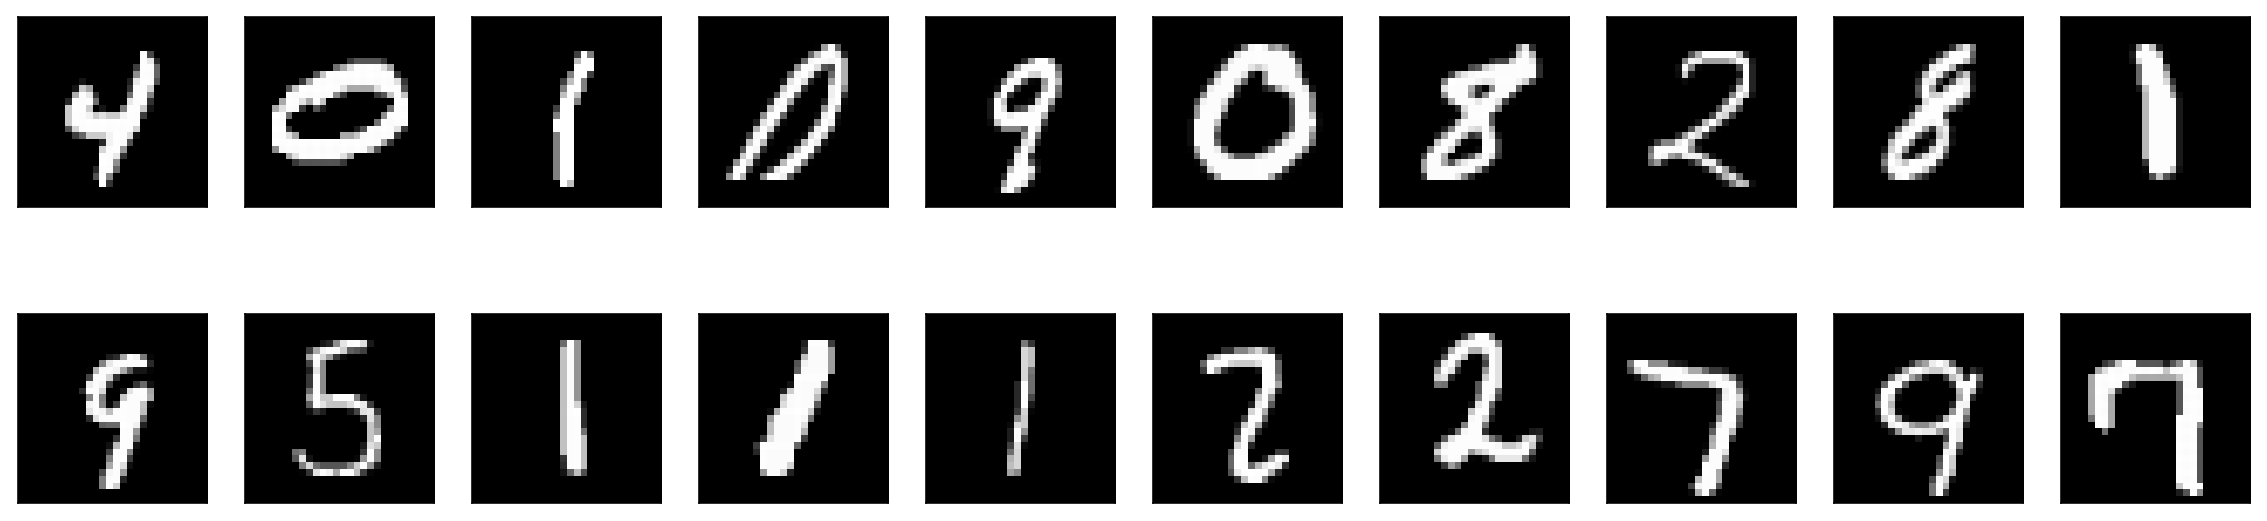

In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter=iter(trainloader)
images,labels=dataiter.next()
images=images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20,5))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2,batch_size/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    

## Inference and validation

In [46]:
# get the class probabilities

model=Classifier()

dataiter=iter(trainloader)
images,labels=dataiter.next()

ps=torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [48]:
top_p,top_class=ps.topk(1,dim=1)

#look at most likely classes for the first 10 example
print(top_class[:10,:])

tensor([[7],
        [4],
        [5],
        [4],
        [1],
        [5],
        [1],
        [4],
        [5],
        [5]])


### check if prediction matches labels

In [50]:
equals=top_class==labels.view(*top_class.shape)

In [52]:
equals

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False

#### percentage of correct predictions

In [59]:
accuracy=torch.mean(equals.type(torch.FloatTensor))
print(f'accuracy:{accuracy.item()*100}%')

accuracy:18.75%


### Validation loop

In [64]:
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=30
steps=0

train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        # turn of gradients for validation it saves memory and computation
        
        with torch.no_grad():
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print('Epochs:{}/{}'.format(e+1,epochs),
              'training_loss:{:.3f}'.format(running_loss,len(trainloader)),
               'test_loss:{:.3f}'.format(test_loss/len(testloader)),
               'test accuracy:{:.3f}'.format(accuracy,len(testloader)))
    

Epochs:1/30 training_loss:315.773 test_loss:0.182 test accuracy:2359.250
Epochs:2/30 training_loss:154.710 test_loss:0.174 test accuracy:2372.500
Epochs:3/30 training_loss:127.520 test_loss:0.140 test accuracy:2393.500
Epochs:4/30 training_loss:108.289 test_loss:0.128 test accuracy:2399.750
Epochs:5/30 training_loss:100.394 test_loss:0.116 test accuracy:2423.750
Epochs:6/30 training_loss:90.318 test_loss:0.191 test accuracy:2372.250
Epochs:7/30 training_loss:86.211 test_loss:0.119 test accuracy:2417.750
Epochs:8/30 training_loss:77.740 test_loss:0.107 test accuracy:2426.000
Epochs:9/30 training_loss:77.441 test_loss:0.112 test accuracy:2425.750
Epochs:10/30 training_loss:72.017 test_loss:0.114 test accuracy:2425.250
Epochs:11/30 training_loss:69.040 test_loss:0.113 test accuracy:2423.500
Epochs:12/30 training_loss:63.871 test_loss:0.122 test accuracy:2422.250
Epochs:13/30 training_loss:67.135 test_loss:0.118 test accuracy:2421.500
Epochs:14/30 training_loss:61.873 test_loss:0.125 test 

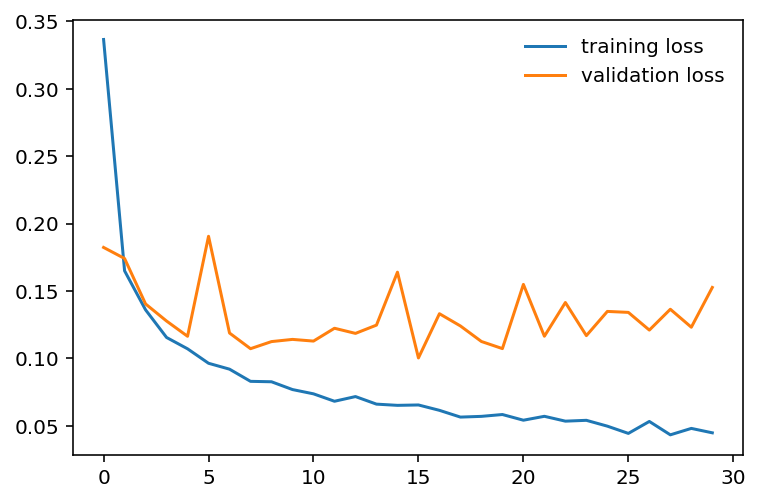

In [66]:
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='validation loss')
plt.legend(frameon=False)

## Dropout  (one of the solution for overfitting)

In [67]:
# Define network achitecture

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.func1=nn.Linear(784,256)
        self.func2=nn.Linear(256,128)
        self.func3=nn.Linear(128,64)
        self.func4=nn.Linear(64,10)
        
        #dropout module with 0.2  drop probability
        self.dropout=nn.Dropout(p=0.2)
        
    def forward(self,x):
        # flatten tensor
        x=x.view(x.shape[0],-1)
        
        x=self.dropout(F.relu(self.func1(x)))
        x=self.dropout(F.relu(self.func2(x)))
        x=self.dropout(F.relu(self.func3(x)))
       
         # output so no dropout here
        
        x=F.log_softmax(self.func4(x),dim=1)
        
        return x

In [68]:
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=30
steps=0

train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        # turn of gradients for validation it saves memory and computation
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print('Epochs:{}/{}'.format(e+1,epochs),
              'training_loss:{:.3f}'.format(running_loss,len(trainloader)),
               'test_loss:{:.3f}'.format(test_loss/len(testloader)),
               'test accuracy:{:.3f}'.format(accuracy,len(testloader)))

Epochs:1/30 training_loss:464.688 test_loss:0.247 test accuracy:2316.000
Epochs:2/30 training_loss:275.965 test_loss:0.203 test accuracy:2345.750
Epochs:3/30 training_loss:239.376 test_loss:0.164 test accuracy:2383.750
Epochs:4/30 training_loss:224.961 test_loss:0.149 test accuracy:2388.750
Epochs:5/30 training_loss:208.712 test_loss:0.125 test accuracy:2406.250
Epochs:6/30 training_loss:203.023 test_loss:0.134 test accuracy:2402.500
Epochs:7/30 training_loss:195.310 test_loss:0.137 test accuracy:2404.500
Epochs:8/30 training_loss:200.381 test_loss:0.138 test accuracy:2396.750
Epochs:9/30 training_loss:193.416 test_loss:0.144 test accuracy:2405.000
Epochs:10/30 training_loss:182.841 test_loss:0.134 test accuracy:2405.500
Epochs:11/30 training_loss:179.211 test_loss:0.119 test accuracy:2419.750
Epochs:12/30 training_loss:179.638 test_loss:0.138 test accuracy:2401.500
Epochs:13/30 training_loss:181.770 test_loss:0.118 test accuracy:2417.000
Epochs:14/30 training_loss:175.054 test_loss:0.

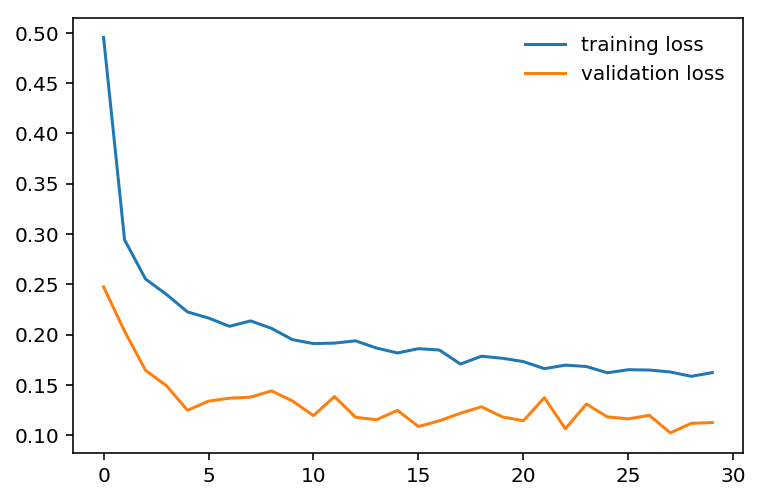

In [69]:
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='validation loss')
plt.legend(frameon=False)